## **pyTopoComplexity**
### **Example for using `RugosityIndex` from `pyrugosity.py` to calculate rugosity index** 

`RugosityIndex` measures **Rugosity Index** of the land surface, which is widely used to assess landscape structural complexity. Such method has been applied in classifying seafloor types by marine geologists and geomorphologist, small-scale hydrodynamics by oceanographers, and studying available habitats in the landscape by ecologists and coral biologists (Wilson et al., 2007).

The example GeoTIFF rasters include lidar Digital Elevation Model (DEM) files that cover the area affected by a deep-seated landslide that occurred in 2014 in the Oso area of the North Fork Stillaguamish River valley, Washington State, USA (Washington Geological Survey, 2023). These example DEMs vary in grid spacing (i.e., grid size), coordinate reference system (CRS), and unit of grid value (elevation, Z).

Archives of codes and example DEM data:
* Zenodo: https://doi.org/10.5281/zenodo.11239338
* Github repository: https://github.com/GeoLarryLai/pyTopoComplexity
<hr>

### **Theory**

The Rugosity Index is determined as the ratio of the contoured area (i.e., true geometric surface area) to the planimetric area within the square moving window, highlighting smaller-scale variations in surface height: 

$$
\text{Rugosity Index} = \frac{\text{Contoured area}}{\text{Planimetric area}}
$$

This module adapts the Triangulated Irregular Networks (TIN) method from Jenness (2004), which approximates the contoured area as the sum of eight truncated-triangle areas. These triangles connect the central grid point, four corner grid points, and four grid points at the middle points of the surrounding edges within the moving window. If no local slope correction is applied, the planimetric area is considered to be the horizontal planar area of the moving window, as decribed in Jenness (2004). Another approach considers slope correction where to the planimetric area is projected onto an plane of the local gradient (Du Preez, 2015). 

By definition, the Rugosity Index is as a minimum value of one (completely flate surface). Typical valuesrange of the conventional rugosity index (without slope correction) from one to three although larger values are possible in very steep terrains. The slope-corrected rugosity index, also called arc-chord ratio (ACR) rugosity index, could provide a better representation of local surface complexity.
<hr>

### **References**
##### Journal Articles: 
* Du Preez, C. (2015) A new arc–chord ratio (ACR) rugosity index for quantifying three-dimensional landscape structural complexity. Landscape Ecol 30, 181–192. https://doi.org/10.1007/s10980-014-0118-8
* Jenness, J.S. (2004) Calculating landscape surface area from digital elevation models. Wildlife Society Bulletin, 32: 829-839. https://doi.org/10.2193/0091-7648(2004)032[0829:CLSAFD]2.0.CO;2 
* Wilson, M.F.J., O’Connell, B., Brown, C., Guinan, J.C., Grehan, A.J., 2007. Multiscale Terrain Analysis of Multibeam Bathymetry Data for Habitat Mapping on the Continental Slope. Marine Geodesy 30, 3-35. https://doi.org/10.1080/01490410701295962.

##### Digital Elevation Model (DEM) Examples:
* Washington Geological Survey, 2023. 'Stillaguamish 2014' project [lidar data]: originally contracted by Washington State Department of Transportation (WSDOT). [accessed April 4, 2024, at http://lidarportal.dnr.wa.gov]
<hr>

#### 0. Import packages
Import the `RugosityIndex` class from the `pyrugosity.py` module.

In [1]:
!pip install pytopocomplexity

In [19]:
import os
from pytopocomplexity import RugosityIndex

In [20]:
help(RugosityIndex)

Help on class RugosityIndex in module pytopocomplexity.pyrugosity:

class RugosityIndex(builtins.object)
 |  RugosityIndex(window_size)
 |
 |  A class for calculating the rugosity index of a land surface using Digital Elevation Model (DEM) data.
 |
 |  The rugosity index is a measure of terrain complexity, calculated as the ratio of the real surface area
 |  to the planar area. This implementation uses a moving window approach and adapts the triangulated
 |  irregular networks method described by Jenness (2004).
 |
 |  If no local slope correction is applied, the planimetric area is considered to be the horizontal planar
 |  area of the moving window, as decribed in Jenness (2004). Another approach considers slope correction
 |  where to the planimetric area is projected onto an plane of the local gradient (Du Preez, 2015).
 |
 |  Required parameters:
 |  -----------
 |  window_size : int
 |      The size of the moving window for rugosity calculation. Must be an odd integer >= 3.
 |  i

#### 1. Instantiate `RugosityIndex` component
**Parameters:**
* `window_size`: desired value for the moving window size (in number of grid cells). **User must specify a desired value for the moving window size.** **The `window_size` must be an odd integer >= 3**. A larger window size will capture broader-scale topographic features, while a smaller window size will highlight more local variations. When `window_size=3`, the function's behavior follows Jenness (2004).

In [21]:
# Instantiate pyrugosity component
rgty = RugosityIndex(window_size=17)

#### 2. Run pyrugosity analysis
The `analyze` function will compute the rugosity index for the given window size.

**Parameters:**
* `input_dir`: file directory to the input DEM raster.
* `slope_correction` *[optional]*: whether to apply slope correction, either True (default) or False. When `slope_correction=True`, it will return arc-chord ratio (ACR) rugosity index ([Du Preez, 2015](https://doi.org/10.1007/s10980-014-0118-8)). When `slope_correction=False`, it will return conventional rugosity index ([Jenness, 2004](https://doi.org/10.2193/0091-7648(2004)032[0829:CLSAFD]2.0.CO;2)).
* `chunk_processing` *[optional]*: whether to use chunk-processing optimization, either True (default) or False, to mitigate the RAM outage issues when handling a large raster file.
* `chunksize` *[optional]*: size of each chunk for chunk-processing, default is (512,512). When chunk-processing is on, user can specify the desired chunk size to optimize the performance on your local machine. Users can choose a smaller chunksize to avoid loading the entire DEM into memory, alleviating RAM issues when handling large GeoTIFF files with relatively limited memory. However, the performance could be impacted (requiring much more processing time) due to the overhead of reading and writing in chunks.

**Outputs:**
* `Z`: the array of input elevation data
* `Rugosity_result`: the result array of rugosity index calculation
* `window_m`: the converted window size in meters, calculated from defined `window_size` and the grid spacing of the input raster

In [22]:
# Define input file name and directory
base_dir = os.path.join(os.getcwd(), 'ExampleDEM') # input file base directory
input_file = 'Ososlid2014_f_3ftgrid.tif'           # input file name
input_dir = os.path.join(base_dir, input_file)     # input file directory

# Run analysis using pyrugosity module
_, _, window_m = rgty.analyze(
    input_dir, 
    slope_correction=True, 
    chunk_processing=True, 
    chunksize=(512, 512)
    )
# The function can return 'Z', 'Rugosity_result', and 'window_m'

[########################################] | 100% Completed | 16.40 ss


#### 3. Export results
The `export_result` function will save the output as a new GeoTIFF raster in the same folder as your input raster.

* When `slope_correction=True` in the `analyze` function, the exported GeoTIFF file will have the name with "_ACR".
* When `slope_correction=False` in the `analyze` function, the exported GeoTIFF file will have the name with "_Conv".

The edge grids, with a width at a half of the `window_size`, of the product rasters are removed to avoid edge effect. 

In [23]:
# Define output file name and file directory
if rgty.slope_correction:
    output_file = os.path.splitext(input_file)[0] + f'_pyRugosity_ACR({round(window_m, 2)}m).tif'
else:
    output_file = os.path.splitext(input_file)[0] + f'_pyRugosity_Conv({round(window_m, 2)}m).tif'
output_dir = os.path.join(base_dir, output_file)

# Export result geotiff
rgty.export_result(output_dir)

'Ososlid2014_f_3ftgrid_pyRugosity_ACR(15.54m).tif' is saved


#### 4. Display results
The `plot_result` function can plot the hillshade map of the original DEM and the rugosity result.

**Parameters:**
* `output_dir` *[optional]*: Specify the directory to save the output figure. If it is not specified, the figure will be saved into the same file's directory as your input raster.
* `savefig` *[optional]*: When `savefig = True`, the `plot_result` function will save the output figure in the same folder as your input raster file.
* `figshow` *[optional]*: When `figshow = True`, the `plot_result` function will display the output figure on the screen.
* `showhillshade` *[optional]*: When `showhillshade = True`, the `plot_result` function will display the hillshade plot alongside the rugosity data.
* `rugositycolormax` *[optional]*: Maximum value for rugosity color scale. If not specified, the code will automatically find the most suitable value for the rugosity index raster file

Figure saved as 'Ososlid2014_f_3ftgrid_pyRugosity_ACR(15.54m).png'


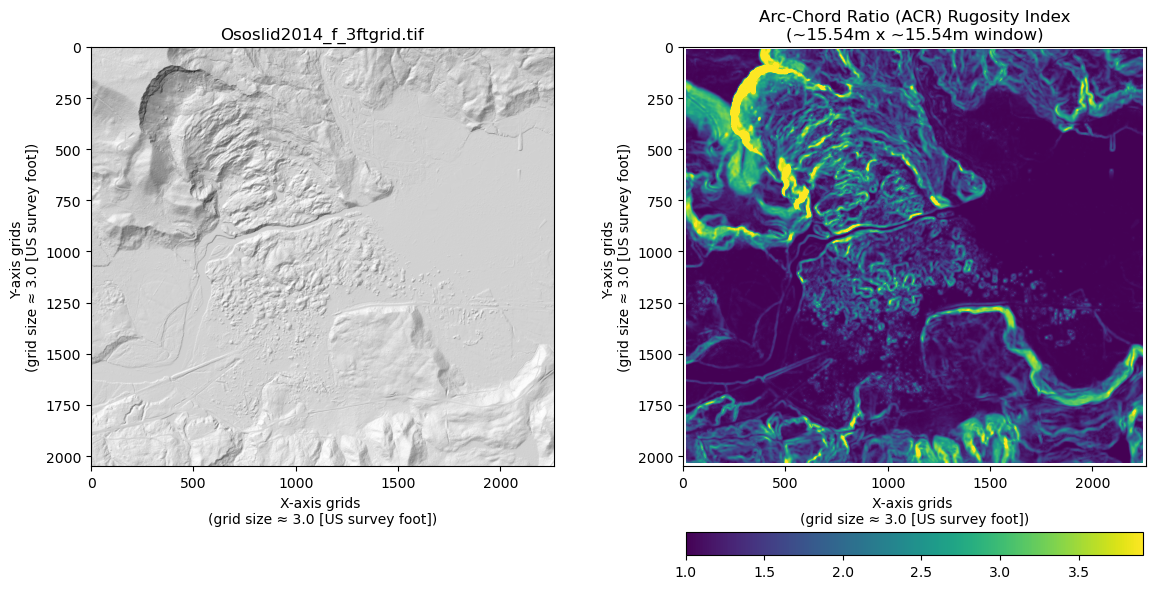

In [24]:
# Plot and save the result figures
rgty.plot_result(
    output_dir=None, 
    savefig=True, 
    figshow=True, 
    showhillshade=True, 
    rugositycolormax=None
    )